# Medical Imaging
## 2020-2021

### Lab 3

### Group 13:
- Alexandra Gonçalves | nº89785
- Catarina Carvalho   | nº89791
- Diogo Vieira        | nº89794
- Mariana Mourão      | nº98473

### Importing relevant libraries

In [53]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import radon, rescale, iradon
from skimage.util import random_noise
from roipoly import RoiPoly
import warnings
from scipy.ndimage import gaussian_filter

### 1. Plotting the phantom

In [54]:
phantom = loadmat('activity.mat') #loading the file, loadmat creates a python dictionary
phantom.keys() #checking the keys

dict_keys(['__header__', '__version__', '__globals__', 'activity'])

In [55]:
# since 'dict' object has no attribute 'shape', the variavle/key 'activity' is accessed and converted from dictionary to 
# numpy array
im_spect = np.array(phantom['activity'])

[rows, cols] = im_spect.shape
print('Phantom size: '+str(im_spect.shape))

# CODIGO DA ALEX:
#type(phantom['activity']),phantom['activity'].shape #checking the type of data and its dimensions
#the image is 128x128

Phantom size: (128, 128)


Text(0.5, 0, 'Columns')

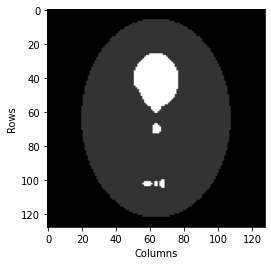

In [56]:
plt.imshow(im_spect, cmap='gray') #plotting the phantom
plt.ylabel('Rows')
plt.xlabel('Columns')

### 2. Simulating the sinogram and the reconstructed SPECT image

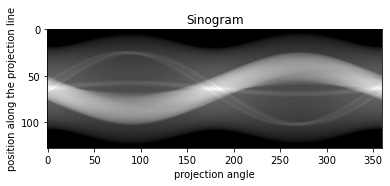

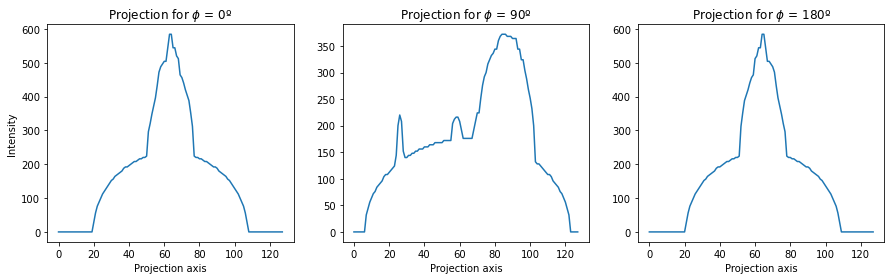

In [57]:
#we use a linspace function to generate evenly spaced numbers in the interval [0,180].
#we tell the function to generate 360 samples to get numbers from 0 to 359 in steps of 1.
theta = np.linspace(0., 359., 360)

#generating the sinogram
sinogram = radon(im_spect, theta=theta, circle=True, preserve_range=True)
plt.imshow(sinogram,  cmap='gray')
plt.title('Sinogram')
plt.xlabel('projection angle')
plt.ylabel('position along the projection line')


# Isolate representative projections...
proj_0 = sinogram[:,0]
proj_90 = sinogram[:,90]
proj_180 = sinogram[:,180]

# ... and plot them
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(proj_0)
plt.title('Projection for $\phi$ = 0º')
plt.ylabel('Intensity')
plt.xlabel('Projection axis')
plt.subplot(1,3,2)
plt.plot(proj_90)
plt.title('Projection for $\phi$ = 90º')
plt.xlabel('Projection axis')
plt.subplot(1,3,3)
plt.plot(proj_180)
plt.title('Projection for $\phi$ = 180º')
plt.xlabel('Projection axis')


# Ignore notebook warnings about deprecated packages
warnings.filterwarnings("ignore")

- The projection for $\phi$ = 0º is a mirror of the one obtained for $\phi$ = 180º. This is an expected result because it goes along with the symmetry at $\pi$ which is a property of the Radon transform.
- The projection for $\phi$ = 90º is wider than the rest (goes from near 0 to approximately 120), because of the oval shape of the phantom - its height is bigger than its width.

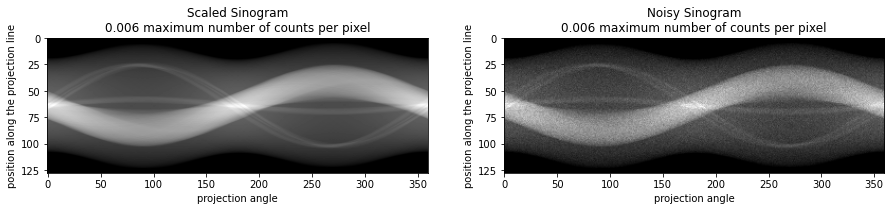

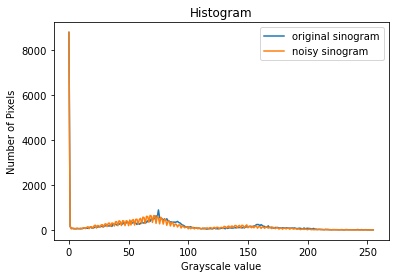

In [58]:
max_value=np.max(sinogram)

# to control the level of noise added when using the functions random_noise/imnoise, try changing the maximum number of 
# photon counts
scaled_max = 2500

#a = scaled_max/max_value
a=1e-5

# Scale the sinogram using maximum number of counts per pixel
scaled_sinogram = sinogram*a
    
scaled_max = a*max_value
    
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(scaled_sinogram,  cmap='gray')
plt.title('Scaled Sinogram' + '\n' + "{0:.3f}".format(scaled_max) + ' maximum number of counts per pixel')
plt.xlabel('projection angle')
plt.ylabel('position along the projection line')
    
# Add Poisson Noise to the Scaled Sinogram
sinogram_noisy = 1/a*random_noise(scaled_sinogram, mode='poisson', clip = False)
plt.subplot(122)
plt.imshow(sinogram_noisy,  cmap='gray')
plt.title('Noisy Sinogram' + '\n' + "{0:.3f}".format(scaled_max) +  ' maximum number of counts per pixel')
plt.xlabel('projection angle')
plt.ylabel('position along the projection line')

plt.figure()
histogram, bin_edges = np.histogram(scaled_sinogram, bins=256) 
plt.title("Histogram")
plt.xlabel("Grayscale value")
plt.ylabel("Number of Pixels")
plt.plot(histogram, label='original sinogram')

histogram, bin_edges = np.histogram(sinogram_noisy, bins=256) 
plt.title("Histogram")
plt.xlabel("Grayscale value")
plt.ylabel("Number of Pixels")
plt.plot(histogram, label = 'noisy sinogram')

plt.legend()

Text(0.5, 0, 'Columns')

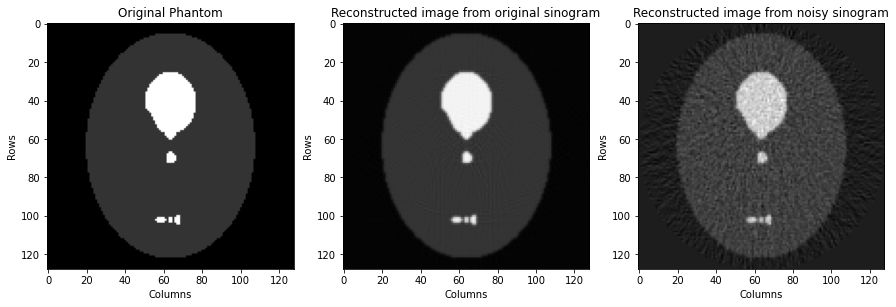

In [59]:
plt.figure(figsize=(15,5))

# For comparison, plot the original phantom and the reconstruted image from the original sinogram
plt.subplot(1,3,1)
plt.imshow(im_spect, cmap='gray')
plt.title('Original Phantom')
plt.ylabel('Rows')
plt.xlabel('Columns')

im_rec = iradon(sinogram, theta = theta, circle=True); # Reconstructed image
plt.subplot(1,3,2)
plt.imshow(im_rec,  cmap='gray')
plt.title('Reconstructed image from original sinogram')
plt.ylabel('Rows')
plt.xlabel('Columns')

# Reconstructed image from the noisy sinogram
im_rec_noisy = iradon(sinogram_noisy, theta=theta, circle=True);
plt.subplot(1,3,3)
plt.imshow(im_rec_noisy,  cmap='gray')
plt.title('Reconstructed image from noisy sinogram')
plt.ylabel('Rows')
plt.xlabel('Columns')

### 3. Defining ROIs for the image

#### Big Hotspot

In [8]:
im_rec_noisy_scaled = im_rec_noisy*(1/np.max(im_rec_noisy))

# Open window to draw the ROIs
%matplotlib qt
plt.figure('Drawing an ROI')
plt.imshow(im_spect, cmap='gray')
big_hotspot_roi = RoiPoly(color='r')  # draw new ROI in red color
plt.imshow(im_spect, cmap='gray')
big_hotspot_roi.display_roi()
big_hotspot_roi.display_mean(im_spect) # displays label of the mean and standard deviation 
# of the intensity of the image within the ROI 

#### Medium Hotspot

In [9]:
%matplotlib qt
plt.figure('Drawing an ROI')
plt.imshow(im_spect, cmap='gray')
medium_hotspot_roi = RoiPoly(color='r')  # draw new ROI in red color
plt.imshow(im_spect, cmap='gray')
medium_hotspot_roi.display_roi()
medium_hotspot_roi.display_mean(im_spect) # displays label of the mean and standard deviation 
# of the intensity of the image within the ROI 

#### Small Hotspot

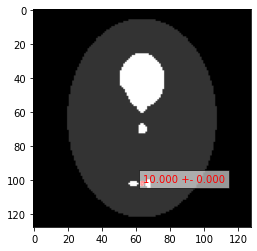

In [28]:
%matplotlib qt
plt.figure('Drawing an ROI')
plt.imshow(im_spect, cmap='gray')
small_hotspot_roi = RoiPoly(color='r')  # draw new ROI in red color
plt.imshow(im_spect, cmap='gray')
small_hotspot_roi.display_roi()
small_hotspot_roi.display_mean(im_spect) # displays label of the mean and standard deviation 
# of the intensity of the image within the ROI 

#### Plot the hotspots

Text(0.5, 1.0, 'Small hotspot\nmask mean = 0.68 , mask stdev=0.05')

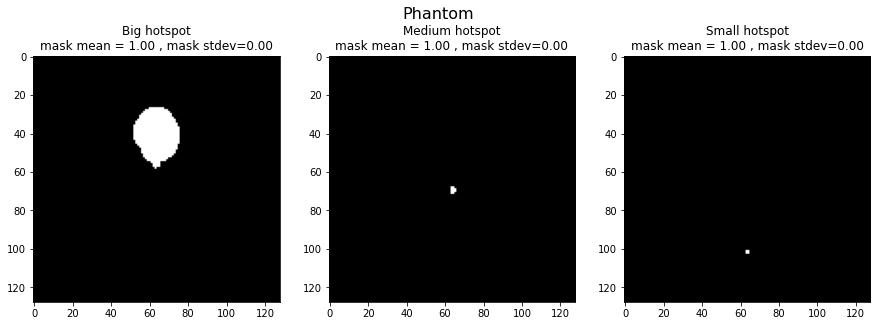

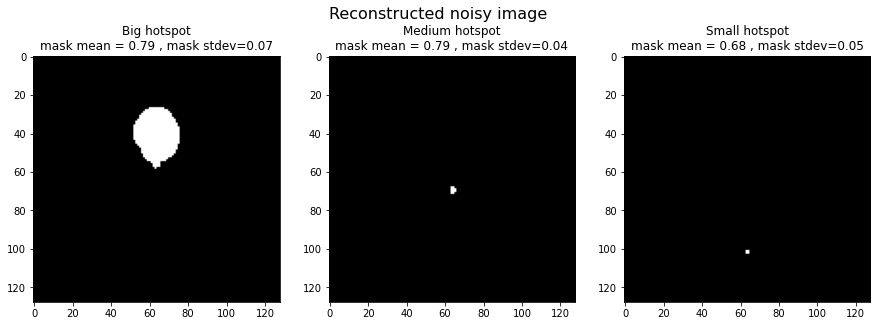

In [60]:
%matplotlib inline

im_spect=im_spect*(1/np.max(im_spect))

plt.figure(figsize=(15,5))
plt.suptitle('Phantom', fontsize=16)
plt.subplot(1,3,1)
big_mask = big_hotspot_roi.get_mask(im_spect)
plt.imshow(big_mask, cmap="gray")
big_m = im_spect[big_mask].mean()
big_s = im_spect[big_mask].std()
plt.title('Big hotspot'+ '\n'+ "mask mean = %.2f , mask stdev=%.2f" % (big_m, big_s))

plt.subplot(1,3,2)
medium_mask = medium_hotspot_roi.get_mask(im_spect)
plt.imshow(medium_mask, cmap="gray")
medium_m = im_spect[medium_mask].mean()
medium_s = im_spect[medium_mask].std()
plt.title('Medium hotspot'+'\n'+"mask mean = %.2f , mask stdev=%.2f" % (medium_m, medium_s))

plt.subplot(1,3,3)
small_mask = small_hotspot_roi.get_mask(im_spect)
plt.imshow(small_mask, cmap="gray")
small_m = im_spect[small_mask].mean()
small_s = im_spect[small_mask].std()
plt.title('Small hotspot'+'\n'+"mask mean = %.2f , mask stdev=%.2f" % (small_m, small_s))




plt.figure(figsize=(15,5))
plt.suptitle('Reconstructed noisy image', fontsize=16)
plt.subplot(1,3,1)
big_mask = big_hotspot_roi.get_mask(im_rec_noisy)
plt.imshow(big_mask, cmap="gray")
big_m = im_rec_noisy_scaled[big_mask].mean()
big_s = im_rec_noisy_scaled[big_mask].std()
plt.title('Big hotspot'+ '\n'+ "mask mean = %.2f , mask stdev=%.2f" % (big_m, big_s))

plt.subplot(1,3,2)
medium_mask = medium_hotspot_roi.get_mask(im_rec_noisy)
plt.imshow(medium_mask, cmap="gray")
medium_m = im_rec_noisy_scaled[medium_mask].mean()
medium_s = im_rec_noisy_scaled[medium_mask].std()
plt.title('Medium hotspot'+'\n'+"mask mean = %.2f , mask stdev=%.2f" % (medium_m, medium_s))

plt.subplot(1,3,3)
small_mask = small_hotspot_roi.get_mask(im_rec_noisy)
plt.imshow(small_mask, cmap="gray")
small_m = im_rec_noisy_scaled[small_mask].mean()
small_s = im_rec_noisy_scaled[small_mask].std()
plt.title('Small hotspot'+'\n'+"mask mean = %.2f , mask stdev=%.2f" % (small_m, small_s))


### 4. Illustration and Quantification of Partial Volume Effects

#### a) Intensity Profiles of the Hot spots

(0.0, 1.0)

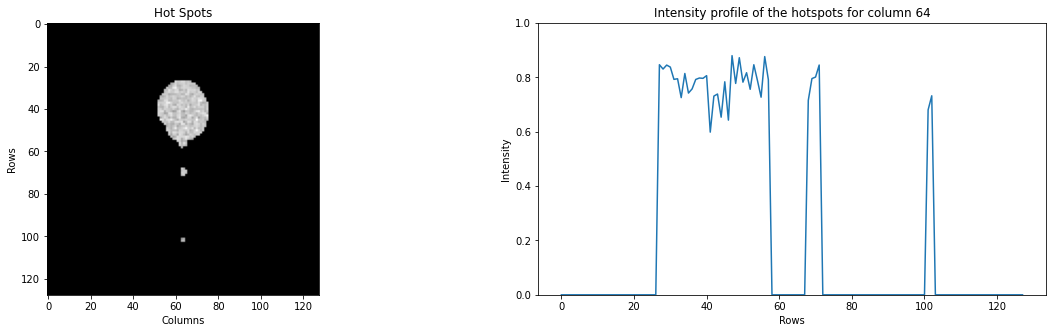

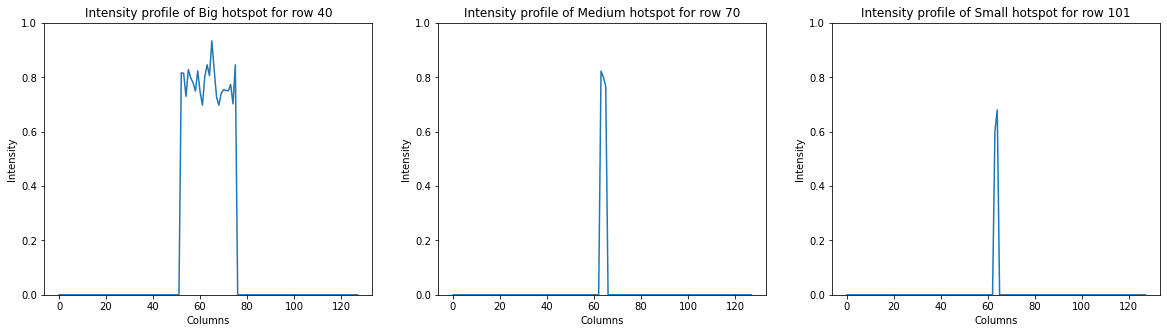

In [62]:
big_hotspot = im_rec_noisy_scaled*big_mask

medium_hotspot = im_rec_noisy_scaled*medium_mask

small_hotspot = im_rec_noisy_scaled*small_mask


full_mask = (big_mask | medium_mask | small_mask)
all_hotspots_image = im_rec_noisy_scaled*full_mask

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.imshow(all_hotspots_image,cmap="gray")
plt.title('Hot Spots')
plt.xlabel('Columns')
plt.ylabel('Rows')

plt.subplot(1,2,2)
plt.plot(all_hotspots_image[:,cols//2])
plt.title('Intensity profile of the hotspots for column ' + str(cols//2))
plt.ylabel('Intensity')
plt.xlabel('Rows')
plt.ylim([0,1])


plt.figure(figsize=(20,5))

row_bighotspot = 40
plt.subplot(1,3,1)
plt.plot(big_hotspot[row_bighotspot,:])
plt.title('Intensity profile of Big hotspot for row ' + str(row_bighotspot))
plt.ylabel('Intensity')
plt.xlabel('Columns')
plt.ylim([0,1])

row_mediumhotspot = 70
plt.subplot(1,3,2)
plt.plot(medium_hotspot[row_mediumhotspot,:])
plt.title('Intensity profile of Medium hotspot for row ' + str(row_mediumhotspot))
plt.ylabel('Intensity')
plt.xlabel('Columns')
plt.ylim([0,1])

row_smallhotspot = 101
plt.subplot(1,3,3)
plt.plot(small_hotspot[row_smallhotspot,:])
plt.title('Intensity profile of Small hotspot for row ' + str(row_smallhotspot))
plt.ylabel('Intensity')
plt.xlabel('Columns')
plt.ylim([0,1])

#### b) Intensity Comparison between Original and Reconstruted Hot spots

Big hotspot:
-> Intensity in phantom = 1.000 ± 0.000 photons/pixel
-> Intensity in reconstruted image = 0.788 ± 0.066 photons/pixel

Medium hotspot:
-> Intensity in phantom = 1.000 ± 0.000 photons/pixel
-> Intensity in reconstruted image = 0.792 ± 0.036 photons/pixel

Small hotspot:
-> Intensity in phantom = 1.000 ± 0.000 photons/pixel
-> Intensity in reconstruted image = 0.685 ± 0.052 photons/pixel


Text(0.5, 0, 'Rows')

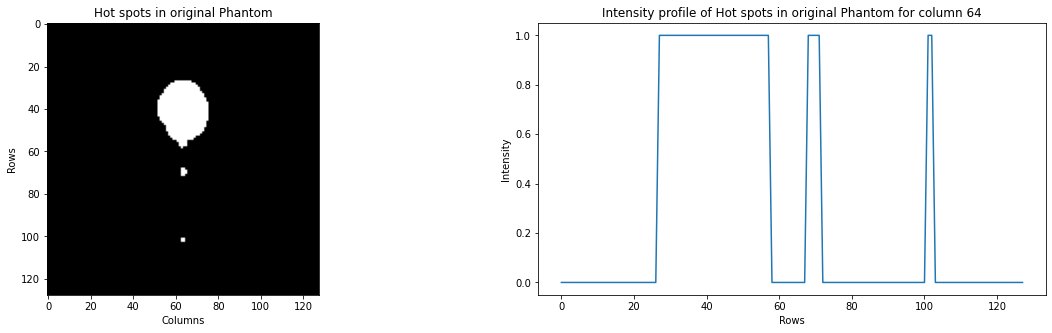

In [48]:
true_bighotspot = im_spect[big_mask]
true_big_mean = true_bighotspot.mean()
true_big_std = true_bighotspot.std()
print('Big hotspot:' + '\n' + '-> Intensity in phantom = ' + "{0:.3f}".format(true_big_mean) + ' ± ' + 
      "{0:.3f}".format(true_big_std) + ' photons/pixel' + '\n' + '-> Intensity in reconstruted image = ' +
      "{0:.3f}".format(big_m) + ' ± ' + "{0:.3f}".format(big_s) + ' photons/pixel' + '\n')

true_mediumhotspot = im_spect[medium_mask]
true_medium_mean = true_mediumhotspot.mean()
true_medium_std = true_mediumhotspot.std()
print('Medium hotspot:' + '\n' + '-> Intensity in phantom = ' + "{0:.3f}".format(true_medium_mean) + ' ± ' + 
      "{0:.3f}".format(true_medium_std) + ' photons/pixel' + '\n' + '-> Intensity in reconstruted image = ' +
      "{0:.3f}".format(medium_m) + ' ± ' + "{0:.3f}".format(medium_s) + ' photons/pixel' + '\n')

true_smallhotspot = im_spect[small_mask]
true_small_mean = true_smallhotspot.mean()
true_small_std = true_smallhotspot.std()
print('Small hotspot:' + '\n' + '-> Intensity in phantom = ' + "{0:.3f}".format(true_small_mean) + ' ± ' + 
      "{0:.3f}".format(true_small_std) + ' photons/pixel' + '\n' + '-> Intensity in reconstruted image = ' +
      "{0:.3f}".format(small_m) + ' ± ' + "{0:.3f}".format(small_s) + ' photons/pixel')

all_hotspots_original = im_spect*full_mask

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.imshow(all_hotspots_original,cmap="gray")
plt.title('Hot spots in original Phantom')
plt.xlabel('Columns')
plt.ylabel('Rows')

plt.subplot(1,2,2)
plt.plot(all_hotspots_original[:,cols//2])
plt.title('Intensity profile of Hot spots in original Phantom for column ' + str(cols//2))
plt.ylabel('Intensity')
plt.xlabel('Rows')

#### c) Effect of changing the spatial resolution and/or the SNR

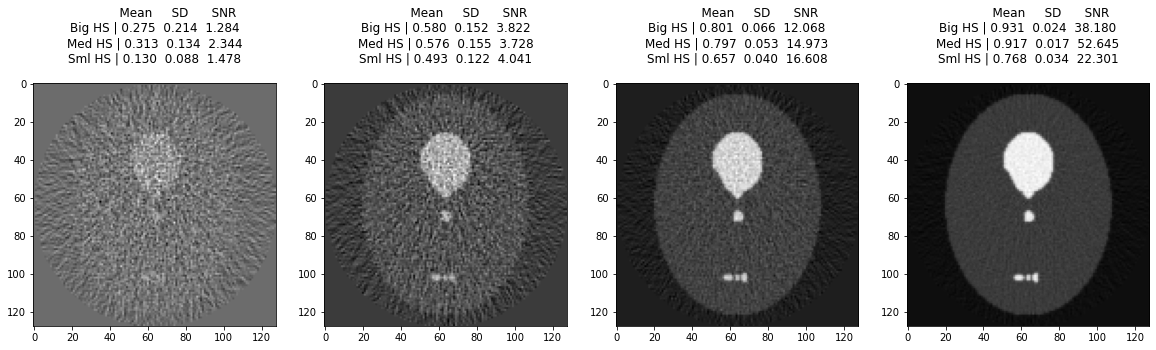

In [63]:
a = [1e-7, 1e-6, 1e-5, 1e-4]

plt.figure(figsize=(20,20))
for i in range(len(a)):
    # Add noise to sinogram to change the SNR
    sinogram_noisy = 1/(a[i])*random_noise(sinogram*a[i], mode='poisson', clip = False)
    
    # Obtain reconstructed image
    im_rec_noisy   = iradon(sinogram_noisy, theta=theta, circle=True);
          
    # Normalize the image
    im_rec_noisy = im_rec_noisy[:]/np.max(im_rec_noisy)
    
    # Define hotspots
    hotspots = [im_rec_noisy[big_mask], im_rec_noisy[medium_mask],  im_rec_noisy[small_mask]]
    #hotspots = hotspots[0]+hotspots[1]+hotspots[2]
    
    # Get mean, standard deviation and SNR
    m_big   = hotspots[0].mean()
    s_big   = hotspots[0].std()
    snr_big = m_big/s_big
    m_med   = hotspots[1].mean()
    s_med   = hotspots[1].std()
    snr_med = m_med/s_med
    m_sml   = hotspots[2].mean()
    s_sml   = hotspots[2].std()
    snr_sml = m_sml/s_sml
    
    # Plot hotspots
    '''
    for h in range(len(hotspots)): 
        plt.subplot(len(noise_coef),len(hotspots),plt_idx)
        plt.imshow(hotspots[h],cmap="gray")
        plt_idx += 1
        plt.axis('off')
    '''
    plt.subplot(1,len(a),i+1)
    plt.imshow(im_rec_noisy,cmap="gray")
    plt.title('            Mean     SD      SNR' + '\n'
              'Big HS | ' + "{0:.3f}  ".format(m_big) + "{0:.3f}  ".format(s_big) + "{0:.3f}".format(snr_big) + '\n'
              'Med HS | ' + "{0:.3f}  ".format(m_med) + "{0:.3f}  ".format(s_med) + "{0:.3f}".format(snr_med) + '\n'
              'Sml HS | ' + "{0:.3f}  ".format(m_sml) + "{0:.3f}  ".format(s_sml) + "{0:.3f}".format(snr_sml) + '\n')    

##### Changing SNR

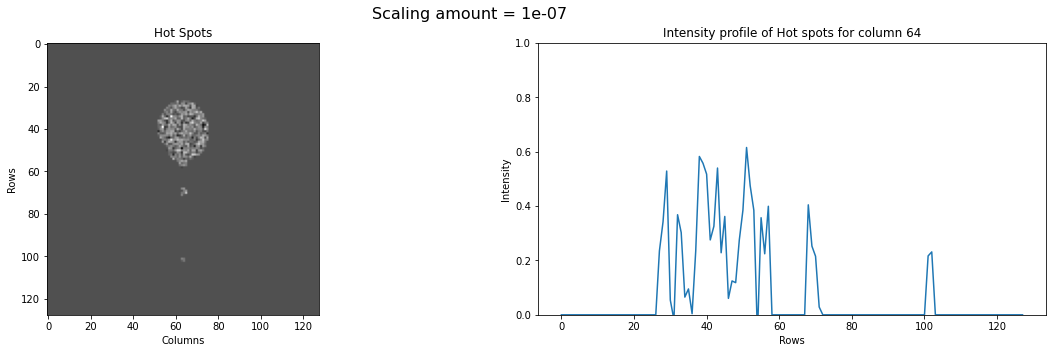

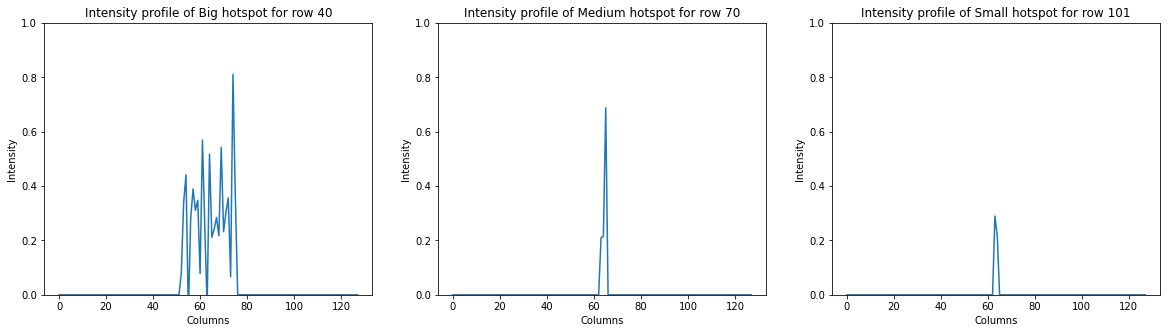

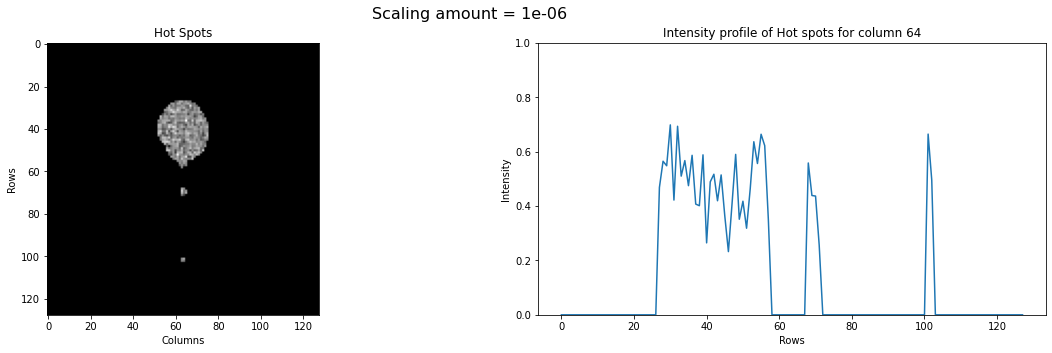

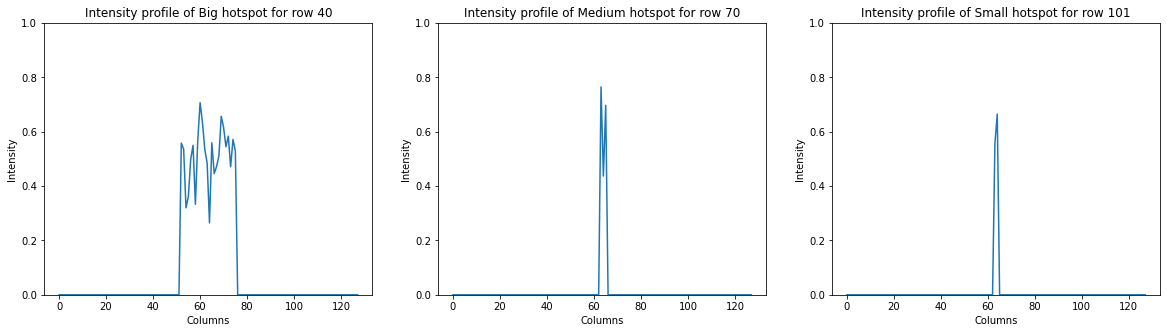

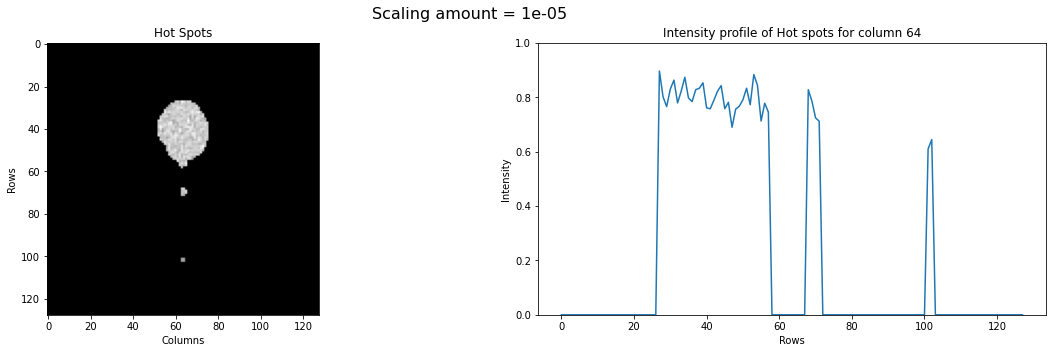

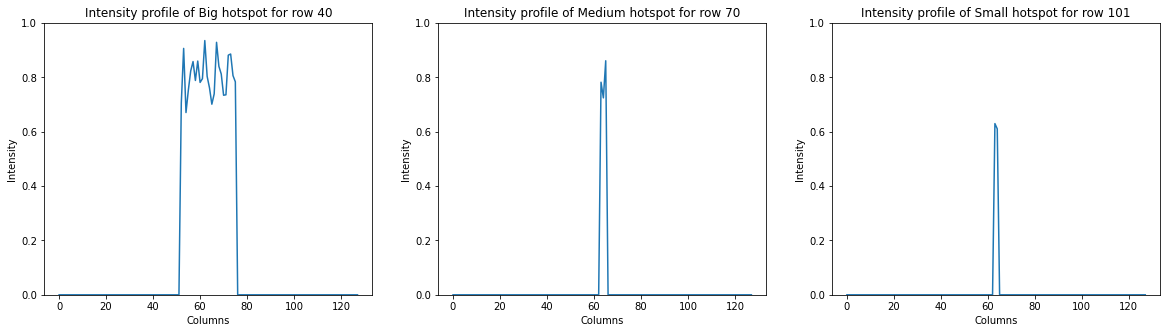

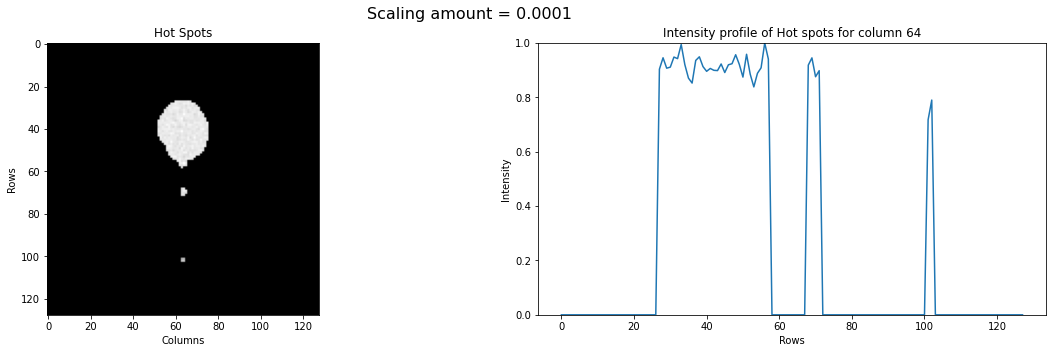

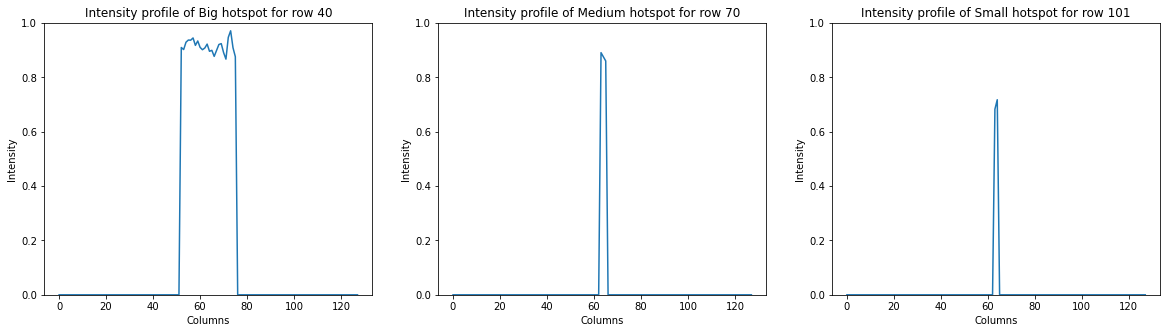

In [64]:
for i in range(len(a)):
    # Add noise to sinogram to change the SNR
    sinogram_noisy = 1/(a[i])*random_noise(sinogram*a[i], mode='poisson', clip = False)
    
    # Obtain reconstructed image
    im_rec_noisy   = iradon(sinogram_noisy, theta=theta, circle=True);
    
    # Normalize the image
    im_rec_noisy = im_rec_noisy[:]/np.max(im_rec_noisy)
    
    # Define hotspots
    all_hotspots_image = im_rec_noisy*full_mask
    
    # Plot profiles
    plt.figure(figsize=(20,5))
    plt.suptitle('Scaling amount = {}'.format(a[i]), fontsize=16)

    plt.subplot(1,2,1)
    plt.imshow(all_hotspots_image,cmap="gray")
    plt.title('Hot Spots')
    plt.xlabel('Columns')
    plt.ylabel('Rows')

    plt.subplot(1,2,2)
    plt.plot(all_hotspots_image[:,cols//2])
    plt.title('Intensity profile of Hot spots for column ' + str(cols//2))
    plt.ylabel('Intensity')
    plt.xlabel('Rows')
    plt.ylim([0,1])
    
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(all_hotspots_image[row_bighotspot,:])
    plt.title('Intensity profile of Big hotspot for row ' + str(row_bighotspot))
    plt.ylabel('Intensity')
    plt.xlabel('Columns')
    plt.ylim([0,1])

    plt.subplot(1,3,2)
    plt.plot(all_hotspots_image[row_mediumhotspot,:])
    plt.title('Intensity profile of Medium hotspot for row ' + str(row_mediumhotspot))
    plt.ylabel('Intensity')
    plt.xlabel('Columns')
    plt.ylim([0,1])

    plt.subplot(1,3,3)
    plt.plot(all_hotspots_image[row_smallhotspot,:])
    plt.title('Intensity profile of Small hotspot for row ' + str(row_smallhotspot))
    plt.ylabel('Intensity')
    plt.xlabel('Columns')
    plt.ylim([0,1])

#### Simulating a PSF with a Gaussian Filter and Manipulating the Spatial Resolution

para PSF que sao mais largas ve se que as imagens vao ficar mais desfocadas, 
nao sendo possivel resolver bem a imagem

neste caso o gaussian filter é para simular different set ups in terms of acquisition, podendo se ter um sistema que tem a PSF that is much widther compared to another. Por exemplo, se se tiver colimadores, nao se é capaz de diferenciar spatial locations that are very closely together 

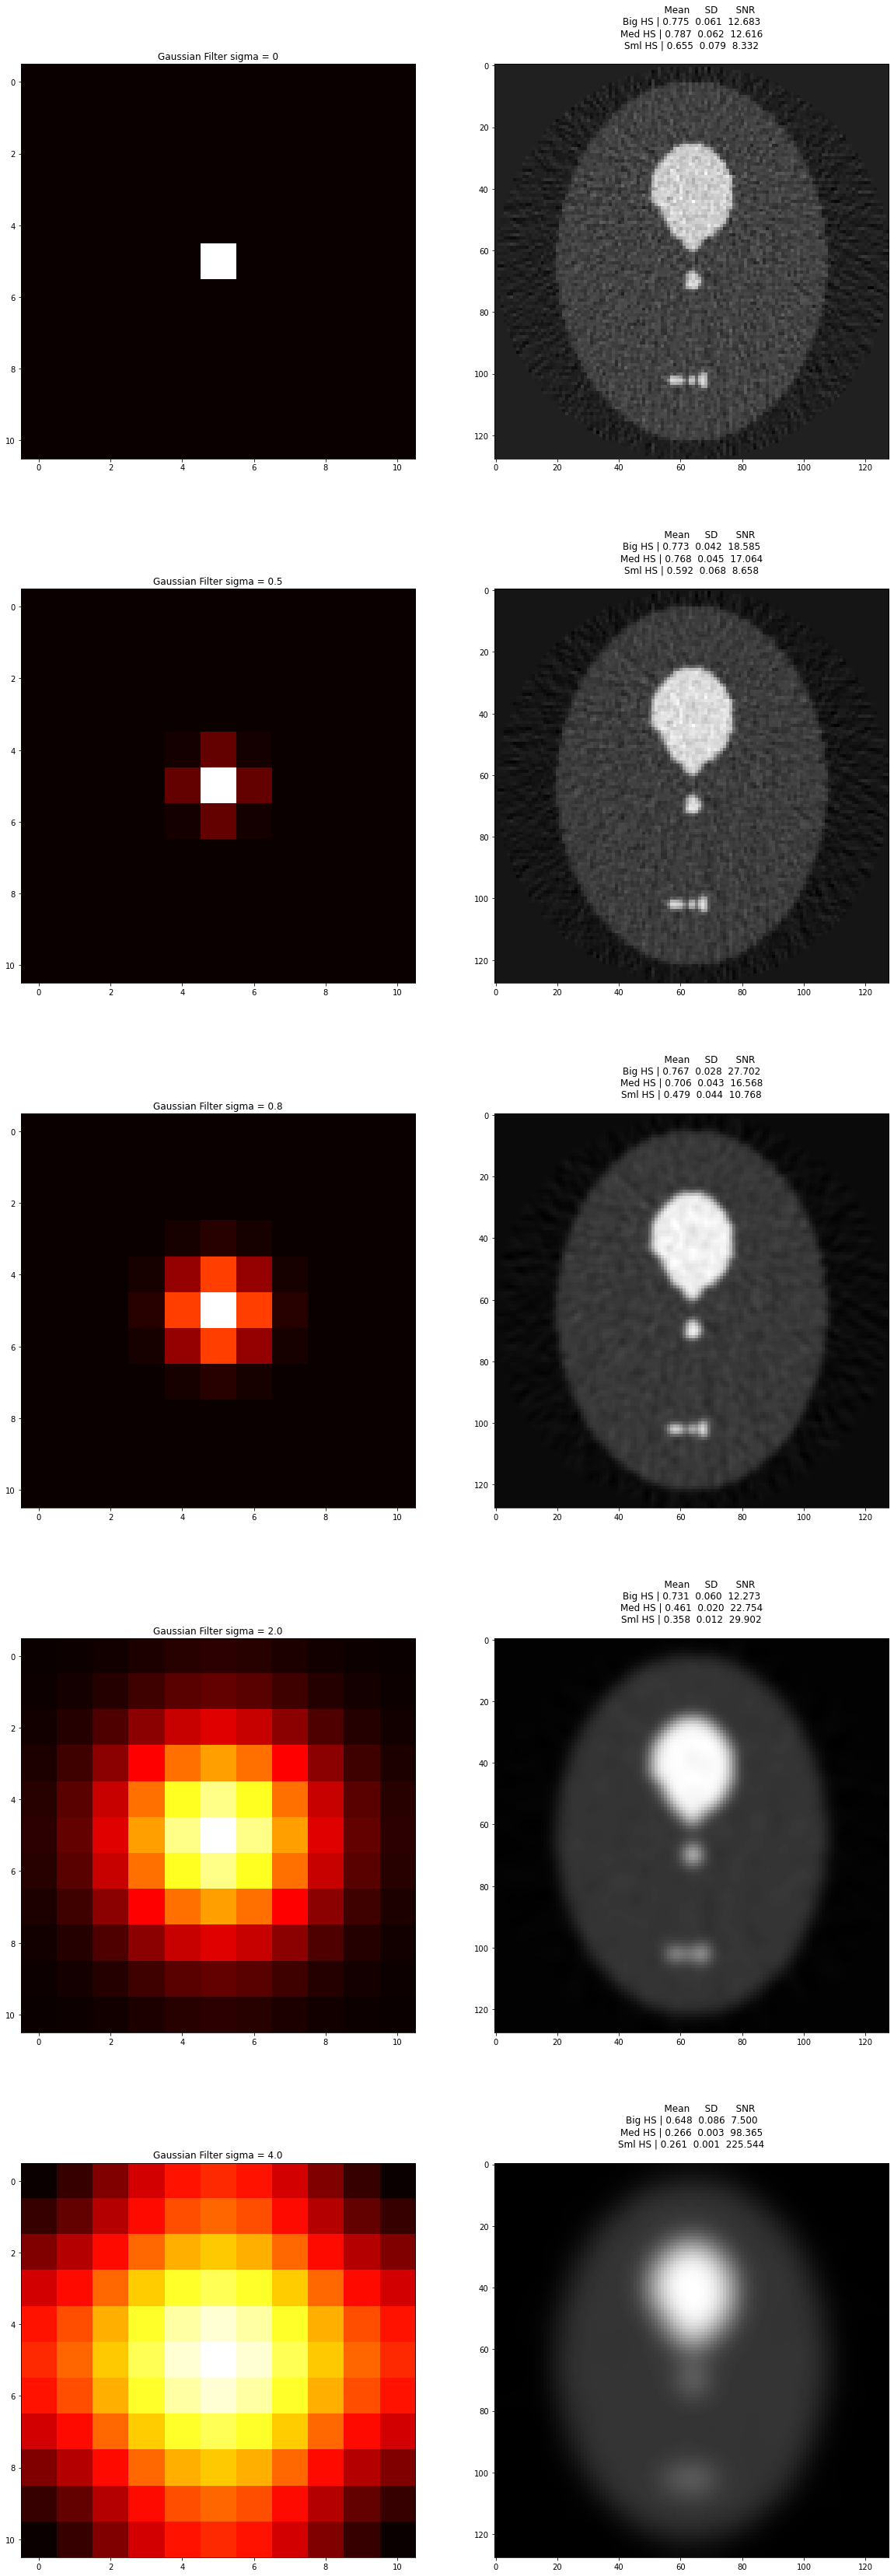

In [49]:
a = 1e-5
# Add noise to sinogram to change the SNR
sinogram_noisy = 1/(a)*random_noise(sinogram*a, mode='poisson', clip = False)

# Obtain reconstructed image
im_rec_noisy   = iradon(sinogram_noisy, theta=theta, circle=True)

# Normalize the image
im_rec_noisy = im_rec_noisy[:]/np.max(im_rec_noisy)

deltaDirac = np.zeros([11, 11])
deltaDirac[5, 5] = 1 # delta dirac, being one pixel in the middle of the FOV

# Apply a blurring filter
sigmas = [0, 0.5, 0.8, 2.0, 4.0]

#filters = [0, 0.1, 0.5, 0.8]

plt.figure(figsize=(20,60))
for i in range(len(sigmas)):
    
    psf = gaussian_filter(deltaDirac, sigma=sigmas[i]) # obter the PSF, by convolving
    
    im_rec_noisy = gaussian_filter(im_rec_noisy, sigma=sigmas[i]) # obtaining the PSF, by convolving
    
    # Define hotspots
    hotspots = [im_rec_noisy[big_mask], im_rec_noisy[medium_mask],  im_rec_noisy[small_mask]]
    #hotspots = hotspots[0]+hotspots[1]+hotspots[2]
    
    # Get mean, standard deviation and SNR
    m_big   = hotspots[0].mean()
    s_big   = hotspots[0].std()
    snr_big = m_big/s_big
    m_med   = hotspots[1].mean()
    s_med   = hotspots[1].std()
    snr_med = m_med/s_med
    m_sml   = hotspots[2].mean()
    s_sml   = hotspots[2].std()
    snr_sml = m_sml/s_sml
    
    # Plot hotspots
    '''
    for h in range(len(hotspots)): 
        plt.subplot(len(noise_coef),len(hotspots),plt_idx)
        plt.imshow(hotspots[h],cmap="gray")
        plt_idx += 1
        plt.axis('off')
    '''
    plt.subplot(len(sigmas),2,i*2+1)
    plt.imshow(psf, cmap='hot')
    plt.title('Gaussian Filter sigma = ' + str(sigmas[i]))

    plt.subplot(len(sigmas),2,i*2+2)
    plt.imshow(im_rec_noisy,cmap="gray")
    plt.title('            Mean     SD      SNR' + '\n'
              'Big HS | ' + "{0:.3f}  ".format(m_big) + "{0:.3f}  ".format(s_big) + "{0:.3f}".format(snr_big) + '\n'
              'Med HS | ' + "{0:.3f}  ".format(m_med) + "{0:.3f}  ".format(s_med) + "{0:.3f}".format(snr_med) + '\n'
              'Sml HS | ' + "{0:.3f}  ".format(m_sml) + "{0:.3f}  ".format(s_sml) + "{0:.3f}".format(snr_sml) + '\n')       

##### Changing resolution

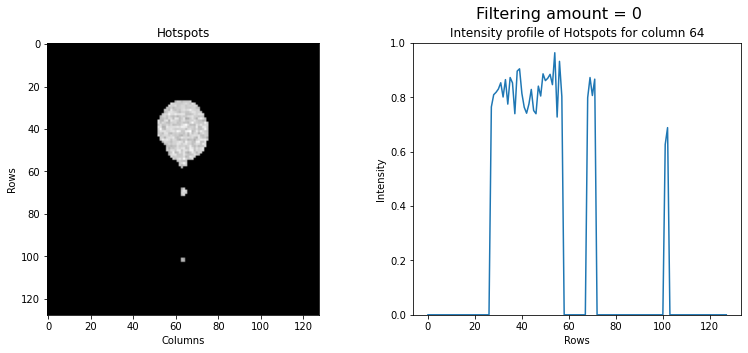

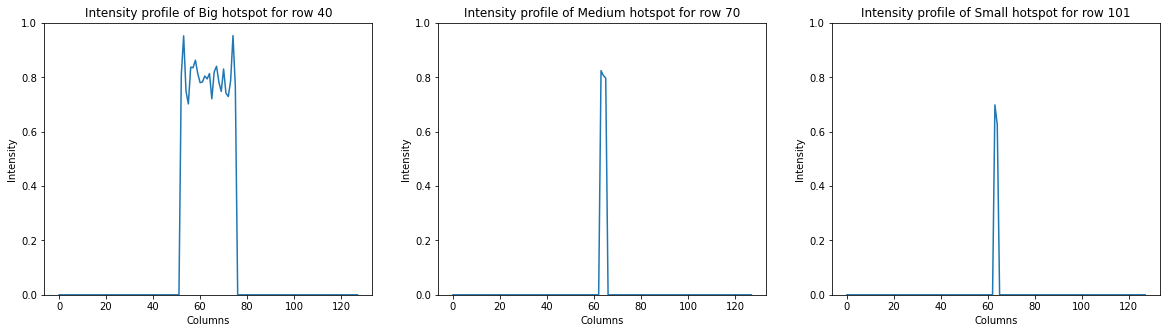

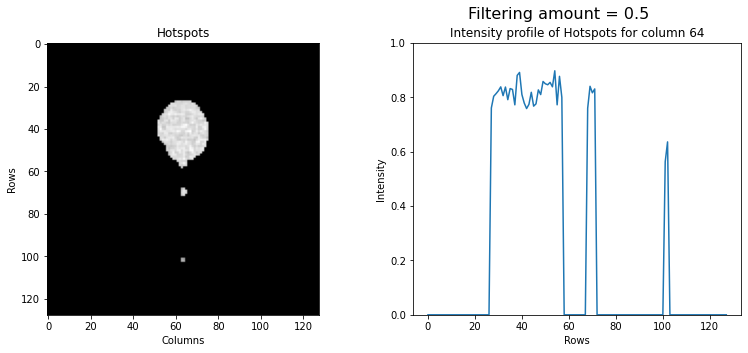

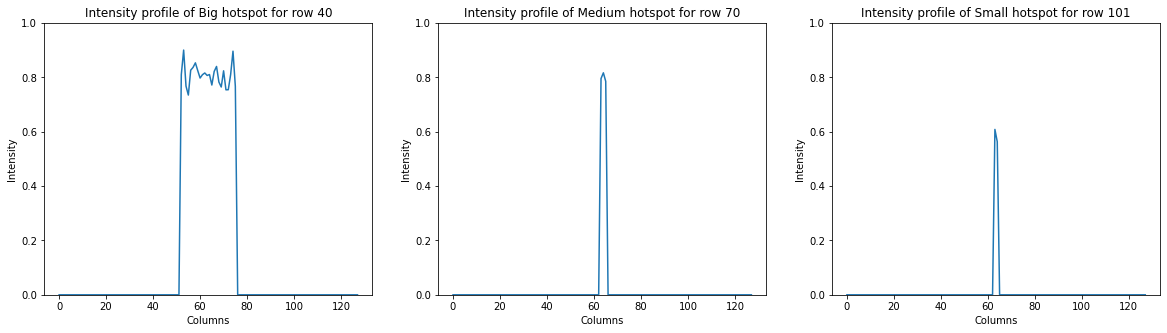

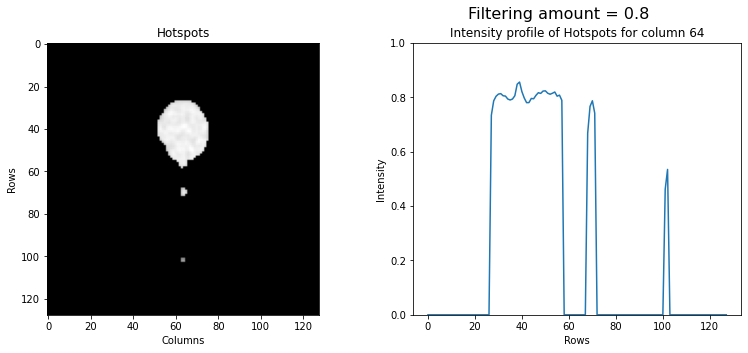

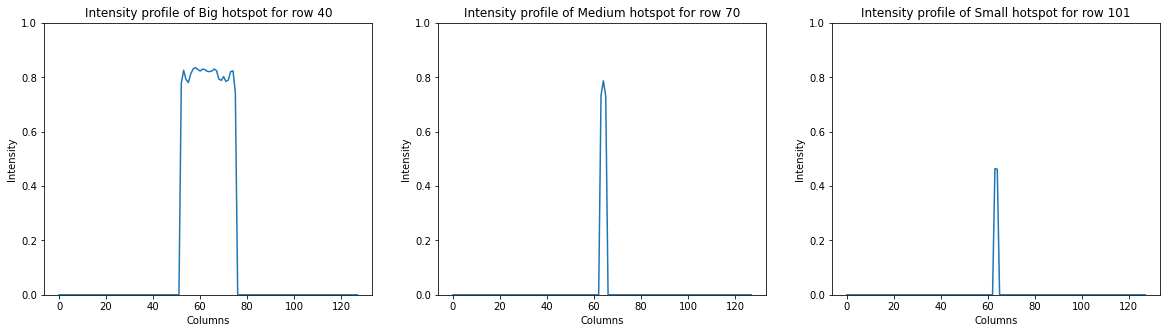

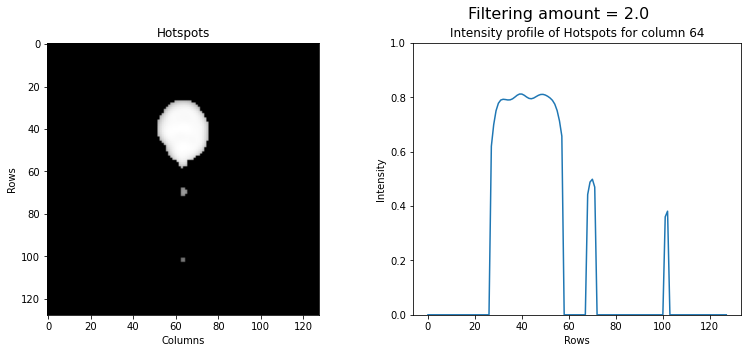

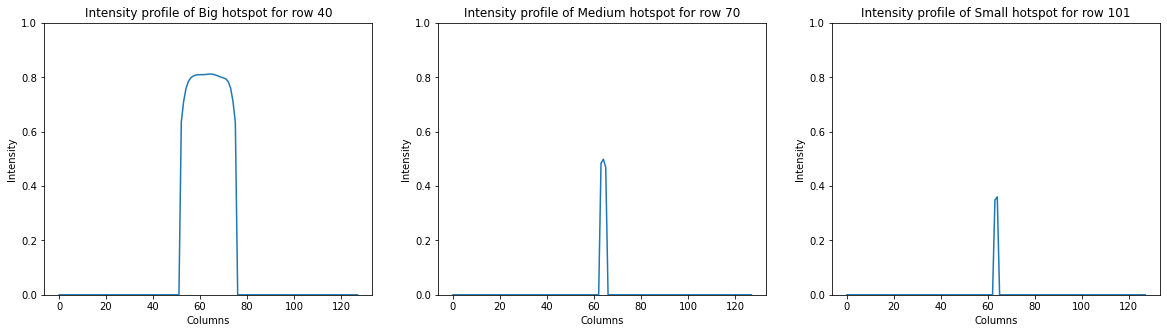

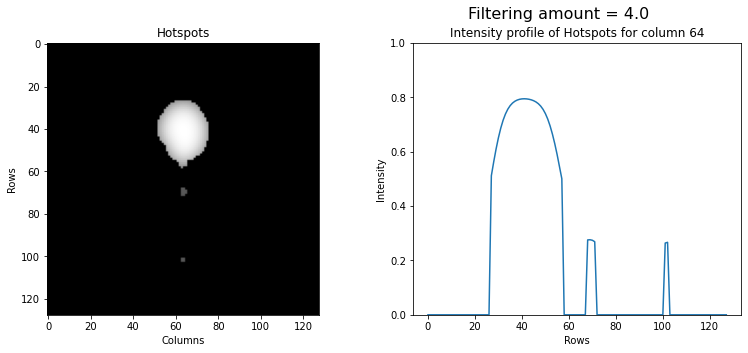

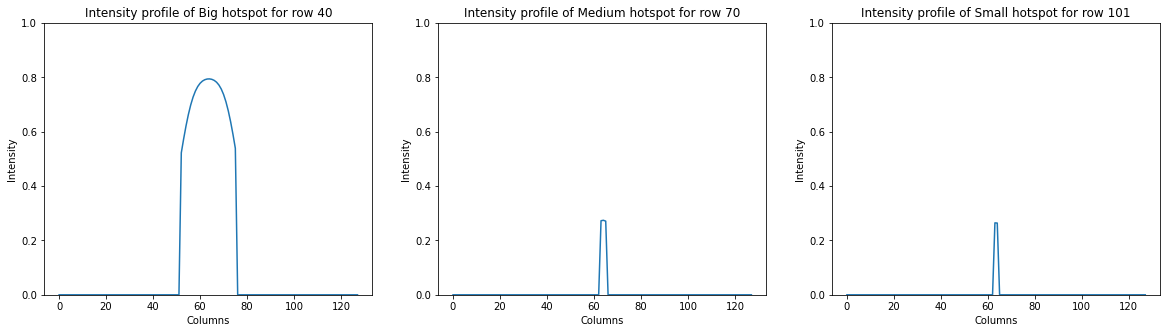

In [65]:
a = 1e-5
# Add noise to sinogram to change the SNR
sinogram_noisy = 1/(a)*random_noise(sinogram*a, mode='poisson', clip = False)

# Obtain reconstructed image
im_rec_noisy   = iradon(sinogram_noisy, theta=theta, circle=True)

# Normalize the image
im_rec_noisy = im_rec_noisy[:]/np.max(im_rec_noisy)

for i in range(len(sigmas)):
    im_rec_noisy = gaussian_filter(im_rec_noisy, sigma=sigmas[i])
    
    # Define hotspots
    all_hotspots_image = im_rec_noisy*full_mask
    
    # Plot profiles
    plt.figure(figsize=(20,5))
    plt.suptitle('Filtering amount = {}'.format(sigmas[i]), fontsize=16)

    plt.subplot(1,3,1)
    plt.imshow(all_hotspots_image,cmap="gray")
    plt.title('Hotspots')
    plt.xlabel('Columns')
    plt.ylabel('Rows')

    plt.subplot(1,3,2)
    plt.plot(all_hotspots_image[:,cols//2])
    plt.title('Intensity profile of Hotspots for column ' + str(cols//2))
    plt.ylabel('Intensity')
    plt.xlabel('Rows')
    plt.ylim([0,1])
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(all_hotspots_image[row_bighotspot,:])
    plt.title('Intensity profile of Big hotspot for row ' + str(row_bighotspot))
    plt.ylabel('Intensity')
    plt.xlabel('Columns')
    plt.ylim([0,1])

    plt.subplot(1,3,2)
    plt.plot(all_hotspots_image[row_mediumhotspot,:])
    plt.title('Intensity profile of Medium hotspot for row ' + str(row_mediumhotspot))
    plt.ylabel('Intensity')
    plt.xlabel('Columns')
    plt.ylim([0,1])

    plt.subplot(1,3,3)
    plt.plot(all_hotspots_image[row_smallhotspot,:])
    plt.title('Intensity profile of Small hotspot for row ' + str(row_smallhotspot))
    plt.ylabel('Intensity')
    plt.xlabel('Columns')
    plt.ylim([0,1])